# Data Science
    K-means Clustering Implementation Naive Way
    
    This script generates random data in clusters of 2 or 4. It then prompts the user how many clusters
    they would like the k means clustering implementation to use. It then prints out each step and color
    codes the data into their respective cluster.

Enter number of clusters : 4


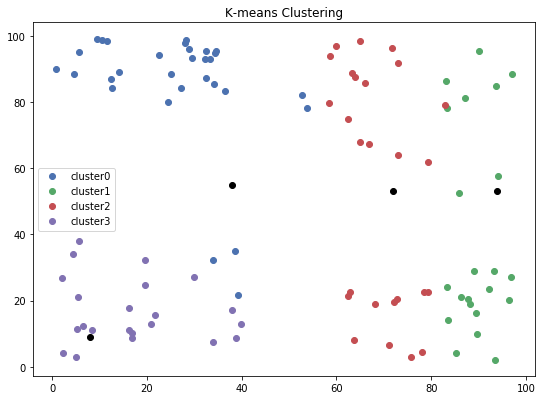

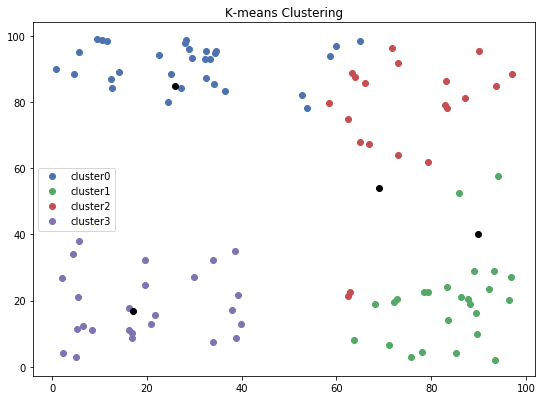

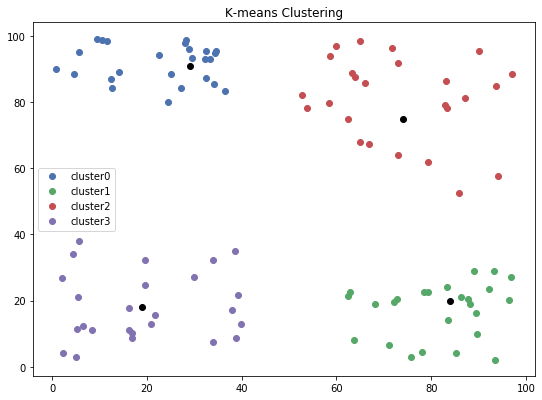

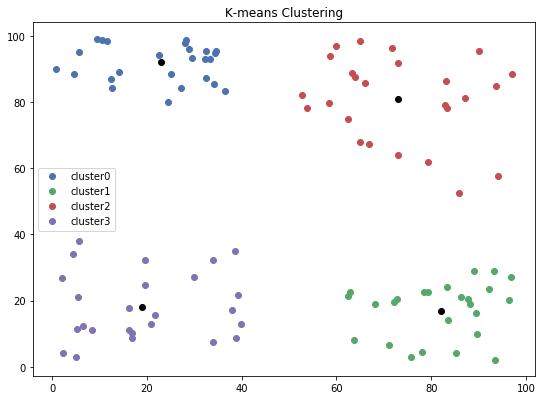

In [38]:
import matplotlib.pylab as plt
import numpy as np
import math


'''
    Constants
'''
numDataPoints = 100
iterations = 0
centroids = []
clusterCentroidx = []
clusterCentroidy = []
'''
    Helper Functions
'''

# Generates random data that is in two clusters
def twoClusterData():
    datax = []
    datay = []
    data = []
    for i in range(int(numDataPoints / 2)):
        x = np.random.uniform(0,40)
        y = np.random.uniform(0,40)
        datax.append(x)
        datay.append(y)
        data.append((x,y))
        x = np.random.uniform(40,100)
        y = np.random.uniform(40,100)
        datax.append(x)
        datay.append(y)
        data.append((x,y))
    return datax, datay, data

# Generates random data that is in four clusters
def fourClusterData():
    datax = []
    datay = []
    data = []
    for i in range(int(numDataPoints / 4)):
        x = np.random.uniform(0,40)
        y = np.random.uniform(0,40)
        datax.append(x)
        datay.append(y)
        data.append((x,y))
        x = np.random.uniform(50,100)
        y = np.random.uniform(50,100)
        datax.append(x)
        datay.append(y)
        data.append((x,y))
        x = np.random.uniform(0,40)
        y = np.random.uniform(80,100)
        datax.append(x)
        datay.append(y)
        data.append((x,y))
        x = np.random.uniform(60,100)
        y = np.random.uniform(0,30)
        datax.append(x)
        datay.append(y)
        data.append((x,y))
    return datax, datay, data
    
# Takes in a cluster xy position and a data point xy position and computes the distance
def getDistance(clusterx, clustery, pointx, pointy):
    return math.sqrt((clusterx - pointx)**2 + (clustery - pointy)**2)


# Takes in an integer and makes that integer amount of clusters with randomly generated centroids
def makeCentroid(amount):
    for i in range(clusterNum):
        a = np.random.randint(0,100)
        b = np.random.randint(0,100)
        clusterCentroidx.append(a)
        clusterCentroidy.append(b)
        centroids.append((a, b))
    
# Takes in a list of lists of x-y data, and calculates the centroid for each list of tuples.
# It returns the the new list of centroids
def updateCentroids(clusters):
    tempNewCentroids = []
    center0x = 0
    center0y = 0
    for i in clusters:
        if len(i) != 0:
            clusterListx, clusterListy = zip(*i)
            for j in range(len(i)):
                center0x += clusterListx[j]
                center0y += clusterListy[j]
            tempNewCentroids.append((round((center0x / len(i))), round((center0y / len(i)))))
            center0x = 0
            center0y = 0            
    newCentroids = tempNewCentroids
    return newCentroids


# Finds the closest centroid for each data point and assigns it to a list accordingly
def assignClusters():
    for i in range(numDataPoints):
        distanceList = []
        for j in centroids:
            centroidx, centroidy = j
            newDistance = getDistance(centroidx, centroidy, datax[i], datay[i])
            distanceList.append(newDistance)
        assignment = np.argmin(distanceList)
        clusterLists[assignment].append((datax[i], datay[i]))
'''
    Script
'''

datax, datay, data = fourClusterData()     
        
# Get number of clusters the user wants and randomly generate their starting positions
clusterNum = int(input("Enter number of clusters : "))
makeCentroid(clusterNum)

while (iterations < 100):
    clusterLists = [[] for i in range(clusterNum)]
    # Assign each data point to its closest centroid
    assignClusters()
    
    # Plot the data color coded for its centroid
    plt.style.use('seaborn-deep')
    fig = plt.figure(figsize=(9,6.5))
    plt.plot()
    for i in clusterLists:
        if  len(i) != 0:
            clusterListx, clusterListy = zip(*i)
            plt.plot(clusterListx, clusterListy, 'o', label='cluster' + str(clusterLists.index(i)))
            clusterListx = []
            clusterListy = []
    for i in centroids:
        centroidx, centroidy = i
        plt.plot(centroidx, centroidy, 'o', color='black')
    plt.legend()
    plt.title("K-means Clustering")
    plt.show()
    
    # Now compute new centers for all centroids and check if the new centroids are
    # the same as the old ones. If they are break the loop and it is complete.
    newCentroids = updateCentroids(clusterLists)
    if (newCentroids == centroids):
        break
    centroids = newCentroids
    

   


K means Clustering using Sklearn and also using pandas dataframe. This way is more efficient, compact, and easier to read. The implementation above is for learning purposes.


Once deleted, variables cannot be recovered. Proceed (y/[n])? y


[[70.28426227 71.50255341]
 [19.42270756 18.21090389]]
None


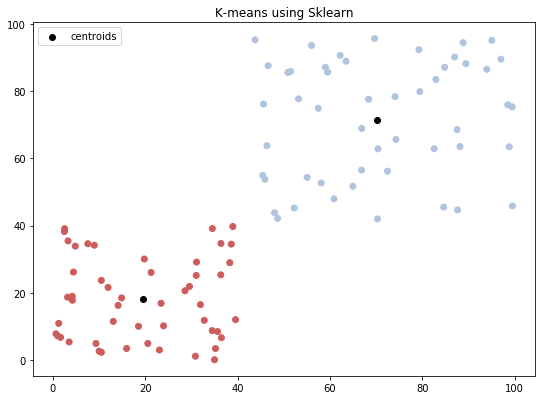

In [33]:
%reset
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
#Constants
numDataPoints = 100
#Helper Function
def twoClusterData():
    datax = []
    datay = []
    data = []
    for i in range(int(numDataPoints / 2)):
        x = np.random.uniform(0,40)
        y = np.random.uniform(0,40)
        datax.append(x)
        datay.append(y)
        data.append((x,y))
        x = np.random.uniform(40,100)
        y = np.random.uniform(40,100)
        datax.append(x)
        datay.append(y)
        data.append((x,y))
    return datax, datay, data

# Script

# get data and convert to dataFrame
datax, datay, data = twoClusterData()
# Turns list of tuples into dataFrame
newData = DataFrame.from_records(data)
  
# fits the data to its centroids
kmeans = KMeans(n_clusters=2).fit(newData)
for i in newData:
    print()
# get coords of all centroids
centroids = kmeans.cluster_centers_
print(centroids)
# Plot centroids and data color coded
fig = plt.figure(figsize=(9,6.5))
print(plt.style.use('seaborn-deep'))
colors = ['lightsteelblue','indianred','y','g','c','r']
plt.scatter(newData[0], newData[1], color=[colors[i] for i in kmeans.labels_])
plt.scatter(centroids[:, 0], centroids[:, 1], color='black', label="centroids")
plt.title("K-means using Sklearn")
plt.legend()
plt.show()